<a href="https://colab.research.google.com/github/aypy01/neural-network/blob/main/neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Networks

Neural networks in AI are inspired by how the brain works. In the brain, neurons are connected cells that send and receive electrical signals. When the input signal to a neuron passes a certain threshold, the neuron activates and sends the signal forward.

An Artificial Neural Network (ANN) is a mathematical model inspired by this idea. It maps inputs to outputs using a network structure that is trained on data. The network learns by adjusting its parameters.

In ANNs, each unit acts like a neuron and connects to other units. For example, if we have two inputs x₁ and x₂ to predict whether it will rain, the hypothesis function can be:

h(x₁, x₂) = w₀ + w₁x₁ + w₂x₂  

Here:
- w₁ and w₂ are weights that adjust the inputs  
- w₀ is the bias, a constant that shifts the overall value


## Activation Functions

To decide whether it rains or not, we apply an activation function to the hypothesis output. Activation functions introduce thresholds or nonlinearities into the model.






```
NOTE:
Do not focus on matplotlib program if you into neural networks.
Just the graph of activation
```



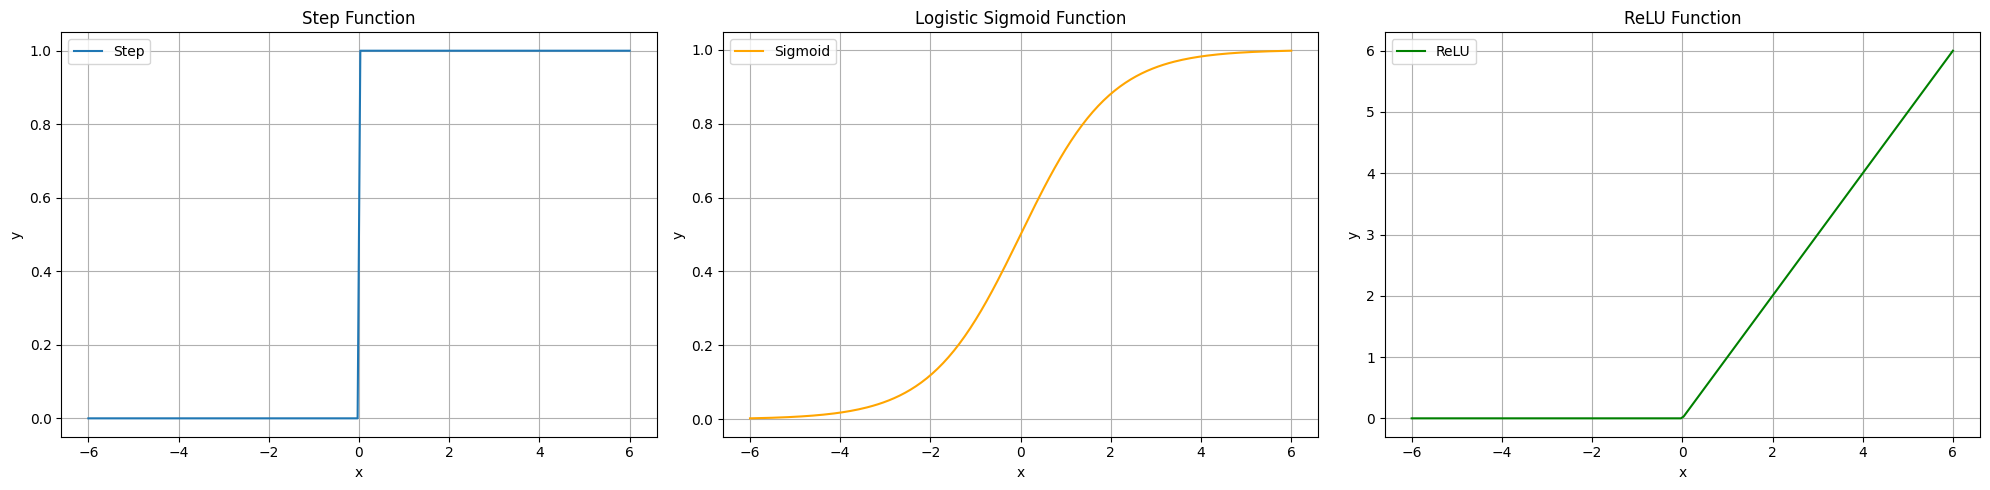

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Common x
x = np.linspace(-6, 6, 200)

# Step Function
y_step = np.where(x >= 0, 1, 0)

# Sigmoid Function
y_sigmoid = 1 / (1 + np.exp(-x))

# ReLU Function
y_relu = np.maximum(0, x)

# Create subplots 1 row, 3 columns
plt.figure(figsize=(20, 5))

# 121 - Step
plt.subplot(1, 3, 1)
plt.plot(x, y_step, label="Step")
plt.title("Step Function")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)

# 122 - Sigmoid
plt.subplot(1, 3, 2)
plt.plot(x, y_sigmoid, label="Sigmoid", color="orange")
plt.title("Logistic Sigmoid Function")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)

# 123 - ReLU
plt.subplot(1, 3, 3)
plt.plot(x, y_relu, label="ReLU", color="green")
plt.title("ReLU Function")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Whichever function we choose to use, we learned [machine learning](https://github.com/aypy01/machine-learning) that the inputs are modified by weights in addition to the bias, and the sum of those is passed to an activation function. This stays true for simple neural networks.

## Neural Network Structure

A neural network can be seen as a system where inputs are combined through weights and a bias, then passed through an activation function to produce an output.

For example, the **OR logical function** can be represented as:

| x | y | f(x, y) |
|---|---|---------|
| 0 | 0 | 0       |
| 0 | 1 | 1       |
| 1 | 0 | 1       |
| 1 | 1 | 1       |

In this case:
- Inputs: x₁ and x₂  
- Weights: both set to 1  
- Bias: -1  
- Function: g(-1 + 1·x₁ + 1·x₂) with threshold 0  

If x₁ = x₂ = 0, the sum is -1, which is below threshold → output 0.  
If either x₁ or x₂ is 1, the sum ≥ 0 → output 1.  

This shows how logical operations can be represented by a simple neural network. The same method works for **AND**, with a different bias (-2).  

Neural networks extend this idea to many inputs. Each input x₁ … xₙ is multiplied by its weight w₁ … wₙ, summed, and combined with bias w₀ to produce the output.




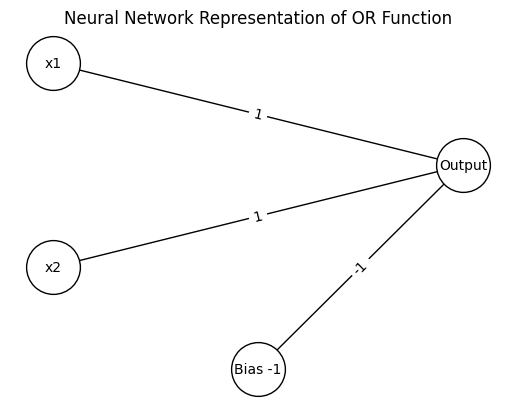

## Gradient Descent

Gradient Descent is an algorithm used to minimize loss when training neural networks. It helps the model learn the best weights automatically from data instead of us manually setting them.

### How Gradient Descent Works
1. Start with random weights (an initial guess).
2. Compute the gradient (a vector showing the direction of steepest increase in loss).
3. Update the weights in the opposite direction of the gradient to reduce loss.
4. Repeat until the loss is minimized.

### Variants of Gradient Descent
- **Batch Gradient Descent**: Uses all data points to compute the gradient. Accurate but computationally expensive.
- **Stochastic Gradient Descent (SGD)**: Uses one random data point to compute the gradient. Faster but noisy.
- **Mini-Batch Gradient Descent**: Uses a small batch of points to compute the gradient. A balance between cost and accuracy.

These methods are used depending on the problem and available resources.

### Why Gradient Descent Matters
- It allows neural networks to adjust weights automatically.
- Works for many types of problems (e.g., predicting weather types).
- Each output neuron can be trained independently.
- Perceptrons (single-layer networks) can only solve linearly separable problems.
- When data are not linearly separable, multilayer neural networks are used.



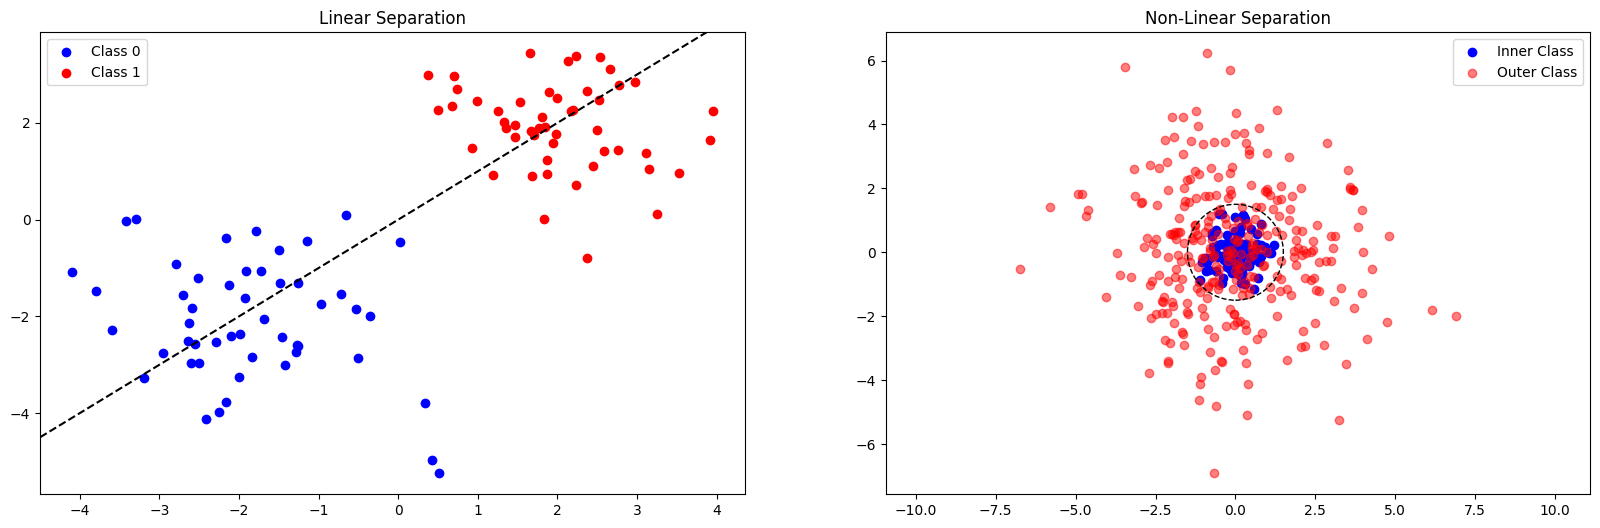

## Multilayer Neural Networks

A multilayer neural network has three main parts:
- Input layer
- Hidden layer(s)
- Output layer

We provide the inputs and expected outputs for training, but the hidden layers learn their own internal values during the process.

How it works:
1. Each unit in the first hidden layer receives weighted inputs from the input layer.
2. It applies an activation function and passes the result forward.
3. The next layer receives these outputs as inputs, applies weights and activation again.
4. This repeats until the output layer is reached.

Hidden layers make it possible for neural networks to model non-linear data, something single-layer networks cannot do.



## Backpropagation

Backpropagation is the core algorithm for training neural networks with hidden layers.  
It adjusts the weights by moving backwards from the output layer to the input layer, using the chain rule of calculus to compute gradients.

### How It Works
1. **Forward Pass**  
   Inputs are passed through the network, layer by layer, until the output is produced.

2. **Error Calculation**  
   The difference between the predicted output and the actual output (loss) is calculated at the output layer.

3. **Backward Pass**  
   - Start from the output layer.  
   - Calculate how much each weight contributed to the error using partial derivatives (gradients).  
   - Propagate this error backward to earlier layers.

4. **Weight Update**  
   Each weight is updated using gradient descent:  
   **new weight = old weight – learning rate × gradient**

### Connection to Tensors
In frameworks like TensorFlow or PyTorch:
- Inputs, weights, and outputs are represented as **tensors** (multi-dimensional arrays).
- During the forward pass, tensor operations compute the outputs.
- In the backward pass, automatic differentiation computes the gradients for each tensor efficiently.
- These gradients are then used to update the weight tensors.

This process repeats for many iterations (epochs) until the network learns good weights.

### Key Idea
Backpropagation + Gradient Descent = the learning mechanism of deep neural networks.  
Without backpropagation, training multilayer neural networks would not be feasible.


## Overfitting

Overfitting happens when a neural network learns the training data too well, including noise and details that do not generalize to new data. As a result, the model performs poorly on unseen data.

### Dropout
One common technique to reduce overfitting is **dropout**.  
- During training, some units are randomly "dropped out" (temporarily removed) from the network.  
- This prevents the model from depending too much on specific units.  
- On each training pass, a slightly different version of the network is used.  
- During testing or deployment, all units are active, but their outputs are scaled to account for dropout.

This helps the network generalize better instead of memorizing the training data.




```
 Note that after the training is finished, the whole neural network will be used again from the input part.
```



## TensorFlow

TensorFlow is a popular Python library that already implements neural networks with backpropagation. Instead of coding the low-level details, we can use its high-level API, **Keras**, to quickly build and train models.

In this example, we want to distinguish between counterfeit and genuine banknotes.



### Fraud Detection


####Importing libraries

In [30]:
import csv #The csv banknote.csv is in the same directory download it and import it in here

#Importing required libraries
import numpy as np
import tensorflow as tf

from sklearn.model_selection import train_test_split


####Reading the csv

In [31]:
# Read data in from file
#You will find the banknotes.csv in the same repository
with open("banknotes.csv") as f:
    reader = csv.reader(f)
    next(reader)

    data = []
    for row in reader:
        data.append({
            "evidence": [float(cell) for cell in row[:4]],
            "label": 1 if row[4] == "0" else 0
        })

####Splitting test/train

In [32]:
# Separate data into training and testing groups
evidence =np.array([row["evidence"] for row in data])
labels =np.array( [row["label"] for row in data])
X_training, X_testing, y_training, y_testing = train_test_split(
    evidence, labels, test_size=0.4)


####Neural Network

In [33]:
# Create a neural network
# Keras is an api that different machine learning algorithms access.
model = tf.keras.models.Sequential()

# A dense layer is one where each node in the current layer is connected to all the nodes from the previous layer. In
# generating our hidden layers we create 8 dense layers, each having 4 input neurons, using the ReLU activation
# function mentioned above.

# Add a hidden layer with 8 units, with ReLU activation
model.add(tf.keras.layers.Input(shape=(4,))) # Nodes=4
model.add(tf.keras.layers.Dense(8, activation="relu"))

# In our output layer, we want to create one dense layer that uses a sigmoid activation function, an activation
# function where the output is a value between 0 and 1 Add output layer with 1 unit, with sigmoid activation
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))


####Compile

In [34]:
# Train neural network Finally, we compile the model, specifying which algorithm should optimize it(adam),
# what type of loss function we use (binary cross entropy) , and how we want to measure its success (in our case, its "accuracy"
# we are interested in the accuracy of the output). Finally, we fit the model on the training data with 20
# repetitions (epochs), and then evaluate it on the testing data.
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

####Training

In [35]:
# Train the neural network without specifying batch_size (let TensorFlow handle it)
model.fit(X_training, y_training, epochs=20)


Epoch 1/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5724 - loss: 1.1597   
Epoch 2/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6392 - loss: 0.8981 
Epoch 3/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6782 - loss: 0.7582 
Epoch 4/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6933 - loss: 0.6566 
Epoch 5/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7111 - loss: 0.5428 
Epoch 6/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7401 - loss: 0.4541 
Epoch 7/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8020 - loss: 0.3429 
Epoch 8/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8401 - loss: 0.3325 
Epoch 9/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8968 - loss: 0.2774 
Epoch 10/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9192 - loss: 0.2635 
Epoch 11/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9411 - loss: 0.2194 
Epoch 12/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy

####Evaluate

In [36]:
# Evaluate how well model performs

model.evaluate(X_testing, y_testing, verbose=2)



18/18 - 0s - 8ms/step - accuracy: 0.9927 - loss: 0.1211


[0.12111254036426544, 0.9927140474319458]

## Computer Vision

Computer vision is about computational methods for analyzing and understanding digital images, often using neural networks.  
Examples include face recognition on social media, handwriting recognition, and self-driving cars.

### Pixels and RGB
- Images are made of pixels.  
- Each pixel has three values (Red, Green, Blue), ranging from 0 to 255.  (if is colored for black and white its 1)
- These are called **RGB values**.  

When creating a neural network:
- Each pixel value is used as input.  
- Hidden layers process the inputs.  
- The output predicts what the image represents.  

Challenges:
1. The network doesn’t use image structure (like humans do).  
2. Large number of inputs = very heavy computation.

---

### Convolution with Kernel

We use **kernels** (small matrices) to extract patterns from images (edges, blur, sharpen, etc.).

#### Example

**Image Matrix (4x4):**

| 10 | 20 | 30 | 40 |

| 10 | 20 | 30 | 40 |

| 20 | 30 | 40 | 50 |

| 20 | 30 | 40 | 50 |

**Kernel Matrix (3x3):**

| 0  | -1 | 0  |

| -1 |  5 | -1 |

| 0  | -1 | 0  |

**Resultant Matrix (2x2):**

Then, we will multiply all the values around it by the corresponding value in the kernel and sum them up (10 * 0 + 20 * (-1) + 30 * 0 + 10 * (-1) + 20 * 5 + 30 * (-1) + 20 * 0 + 30 * (-1) + 40 * 0), producing the value 10 and sililarly 20 ,40 and 50.

| 10 | 20 |
|----|----|
| 40 | 50 |

**Note:** A 4x4 image became a 2x2 after applying the kernel.



#### Blur Kernel (3x3)

| 1/9 | 1/9 | 1/9 |

| 1/9 | 1/9 | 1/9 |

| 1/9 | 1/9 | 1/9 |



#### Edge Detection Kernel (3x3)

| -1 | -1 | -1 |

| -1 |  8 | -1 |

| -1 | -1 | -1 |

Let's implement thi sedge detection in a colored image in a program using Python Image Library(PIL)



####Edge Detection

In [37]:
import math
import sys
from PIL import Image, ImageFilter

# Open image
image = Image.open("edgedetection_input.png").convert("RGB") # edgedetection_input.jpg is in the same directory

# Apply edge detection kernel
filtered = image.filter(ImageFilter.Kernel(
    size=(3, 3),
    kernel=[-1, -1, -1, -1, 8, -1, -1, -1, -1],
    scale=1
))

####Displaying output

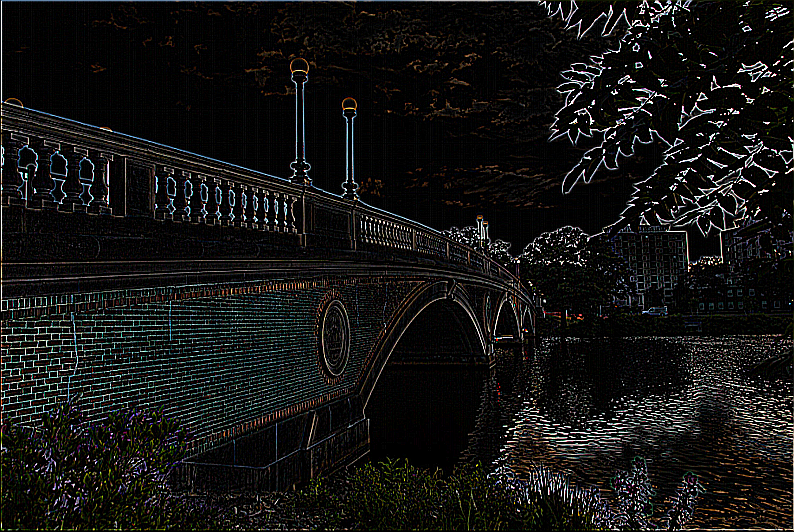

In [38]:
from IPython.display import display

display(filtered)

####Saving image

In [ ]:
#Saving the image
filtered.save("edgedetection_output.png")


### Convolutional Neural Networks

A convolutional neural network (CNN) is a neural network designed for analyzing images.  
It applies **filters (kernels)** to extract features like edges or shapes. These filters are also weights that can be improved during training based on errors. After convolution, the images go through **pooling** (downsampling), which reduces size and keeps the most important features.  

The output is then **flattened** (converted into a single vector) and passed into a traditional neural network.  
Repeating convolution and pooling seperately as these bothe are different steps, helps extract more features and makes the model less sensitive to variations, like images taken from slightly different angles.
#### Image Basics
- **Grayscale image** → 1 channel, pixel values [0–255].
- **RGB image** → 3 channels, each pixel is a triplet (R, G, B), values [0–255].

#### Convolution Operation
- Apply a **kernel (filter matrix)** over local regions of the image.
- Compute **dot product** between kernel and pixel values → produces a **feature map**.
- **Stride** = how far the kernel moves each step.
- **Padding** = controls border handling (same size vs reduced size).
- Certain kernels (e.g., Sobel, Laplacian) highlight **edges** or **patterns**.

#### Pooling
- Reduces spatial size → makes features easier to compute.
- **Max Pooling**: keeps the maximum value in each region.
- Helps reduce overfitting and computation.

#### CNN Flow
1. **Input Image**
2. **Convolution layers** (multiple filters to detect edges, textures, patterns)
3. **Pooling layers** (e.g., max pooling)
4. Repeat convolution + pooling multiple times
5. **Flattening** → convert 2D maps to 1D vector
6. **Fully connected layers** (regular neural network)
7. **Activation functions** (ReLU, Softmax, etc.)
8. **Train/Test Split**
9. **Model Training & Evaluation**


####MNIST Handwriting classification

In [39]:
import sys
import tensorflow as tf

#Use MNIST handwriting dataset inbuilt dataset
#Mnist dataset pf handwriting is like hello world program for convolution neural netwrok

mnist = tf.keras.datasets.mnist

# Prepare data for training
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Create a CNN
model = tf.keras.models.Sequential([

    # Convolutional layer: 32 filters of size 3x3
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),

    # Max-pooling layer: 2x2 pool size
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # Flatten into 1D vector
    tf.keras.layers.Flatten(),

    # Hidden layer with dropout
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.5),

    # Output layer for 10 digit classes
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model before training
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Train the model
model.fit(x_train, y_train, epochs=10)

# Evaluate performance
model.evaluate(x_test, y_test, verbose=2)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 22ms/step - accuracy: 0.8691 - loss: 0.4321
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.9677 - loss: 0.1070
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.9761 - loss: 0.0793
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.9810 - loss: 0.0601
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.9833 - loss: 0.0518
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.9857 - loss: 0.0464
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9881 - loss: 0.0364
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.9898 - loss: 0.0315
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.9910 - loss: 0.0295
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.9917 - loss: 0.0252
313/313 - 1s - 3ms/step - accuracy: 0.9888 - loss: 0.0416


[0.04164457321166992, 0.9887999892234802]

####Saving File

In [40]:
filename=input("Enter the file name without extension ")
model.save(f'{filename}.keras')

print(f"Model saved to {filename}.keras")

Enter the file name without extension MNIST_cnn_model
Model saved to MNIST_cnn_model.keras


## Recurrent Neural Networks

Feed-forward neural networks work by passing input data straight through the layers to produce an output. These networks cannot handle situations where the output depends on previous inputs.

Recurrent Neural Networks (RNNs) introduce a loop in their structure. The network uses its own output as part of the next input, allowing it to capture dependencies across sequences. This makes RNNs powerful for tasks where the data comes in sequences.

For example, Microsoft’s CaptionBot can describe the content of an image with a sentence. The output here is not fixed; it can generate a variable-length sequence of words. A feed-forward network cannot handle this because it always produces a fixed-size output.

RNNs are especially useful for:
- **Image Captioning**: Generating sentences word by word.
- **Video Analysis**: Processing sequences of frames.
- **Machine Translation**: Mapping a sequence of words in one language to a sequence in another.

By maintaining a hidden state that carries information from previous steps, RNNs can handle sequential data effectively.

### How RNN Works
1. Input data flows into the network step by step (e.g., words in a sentence).
2. At each step, the RNN updates a **hidden state** that carries memory of past steps.
3. Output at each step depends on:
   - Current input
   - Previous hidden state
4. Backpropagation Through Time (BPTT) adjusts weights using sequence-wide errors.

### Example Flow
- Input sequence: `x1, x2, x3`
- Hidden states evolve as:
  - `h1 = f(W*x1 + U*h0)`
  - `h2 = f(W*x2 + U*h1)`
  - `h3 = f(W*x3 + U*h2)`
- Output can be generated:
  - **One-to-One:** classification (e.g., sentiment of a sentence).
  - **Many-to-Many:** sequence prediction (e.g., language translation).

### Applications
- **Text generation** (predicting next word/character).
- **Image captioning** (CNN extracts features → RNN generates sentences).
- **Speech recognition** (mapping sound waves to words).
- **Time series prediction** (stock, weather, signals).

### Limitations
- Struggles with **long-term dependencies** (vanishing gradients).
- LSTM and GRU were developed to solve this.


RNNs recycle their own outputs as inputs, making them powerful for **sequences and context**, unlike CNNs which excel in spatial feature extraction.


##Summary:



1.   Artificial Neural Network (ANN):
    ANN mimics brain: neurons + weighted connections + bias.

    Formula: ŷ = f(Wx + b) → activation decides output.

    Training = minimize loss using gradient descent + backpropagation.
2.  Traditional vs Neural network Learning:

    Traditional ML:

        Works well for small, structured/tabular data.

        Needs feature engineering (manual).

        Ex: Logistic Regression, SVM, Decision Trees.

    Neural Networks:

        Handle large, complex, raw data (images, text, audio).

        Learn features automatically.

        Require more data + compute.

        Use when accuracy demand + data scale is high.

3.  CNN (Convolutional Neural Network)

    Designed for images/spatial data.

    Convolution: filter slides over pixels → detects edges/patterns.

    Pooling: downsamples → keeps strongest features.

    Flow: Image → Conv → Pool → Flatten → Dense Layers → Output.
2.   RNN ( Recurrent Neural Netwrok)
        
    Designed for sequences (text, time-series, speech).

    Hidden state carries memory from previous step.

    Flow: input x1 → h1, input x2 + h1 → h2, …

    Good for context-based tasks (translation, speech, text gen).

    Problem: vanishing gradients → solved by LSTM/GRU.





##Final Note:

###          Thank You

This work owes a lot to the **open-source ecosystem**.  
A special thanks goes  to all the people who share knowledge open source.

Just like that , thi is also open source by an amateur self-learner with an intellectually curious mind ,
coz If this weren’t open source for me, I wouldn’t be learning this stuff at all.

I tried to keep **simple things simple** and **complex things possible**.


---
##  Navigation

[![➡️ tensorflow](https://img.shields.io/badge/Next-Tensorflow-000000?style=for-the-badge&logo=github&logoColor=00FF80)](https://github.com/aypy01/tensorflow)
&nbsp;&nbsp;&nbsp;&nbsp;

---

## Author
 <p align="left">
  Created and maintained by
  <a href="https://github.com/aypy01" target="_blank">&nbsp Aaditya Yadav</a>&nbsp
  <a href="https://github.com/aypy01" target="_blank">
    <img src="https://img.shields.io/badge/aypy01-000000?style=flat-square&logo=github&logoColor=00FF80" alt="GitHub Badge"/>
  </a>
</p>

</p>
<p align="left">
  <img src="https://readme-typing-svg.demolab.com?font=Fira+Code&duration=3000&pause=500&color=00FF80&center=false&vCenter=false&width=440&lines=Break+Things+First%2C+Understand+Later;Built+to+Debug%2C+Not+Repeat;Learning+What+Actually+Sticks;Code.+Observe.+Refine." alt="Typing SVG" />
</p>


---

## License

This project is licensed under the [![License: MIT](https://img.shields.io/badge/License-MIT-yellow.svg)](https://opensource.org/licenses/MIT).

---